Dominik Zalewski s24216

# Linear Regression model - predicting cnt value in London bike sharing data set #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#reading csv file
path = r'C:\Users\Dominik\Desktop\Studia\Programowanie dla analityki danych\london_merged.csv'
df = pd.read_csv(path)

In [2]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
#take a look on column's types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


Our dataset contains no null vales.

In [4]:
columns = list(df.columns)
 
# items to be removed
unwanted_cols = {'timestamp', 'cnt'}
 
columns_corr = [i for i in columns if i not in unwanted_cols]
 
# printing modified list
print(columns_corr)

['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season']


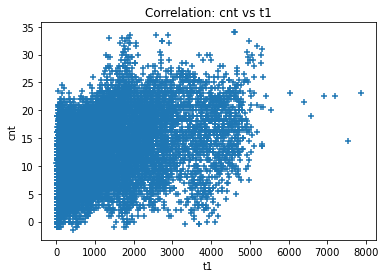

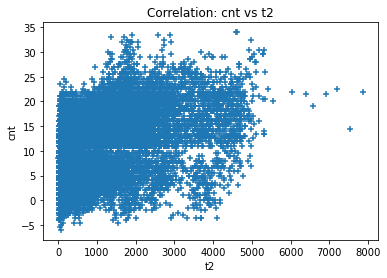

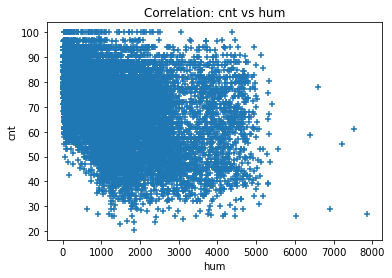

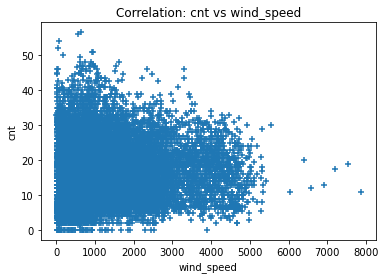

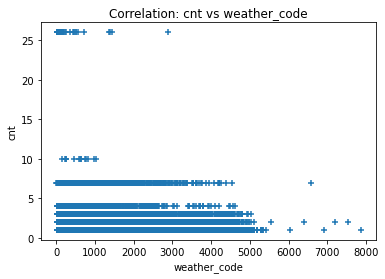

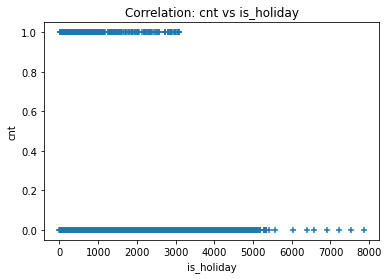

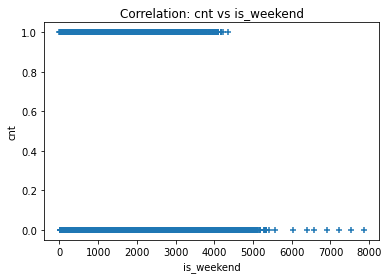

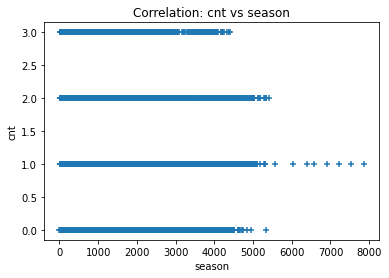

In [5]:
%matplotlib inline

plt.figure()
for _ in range(len(columns_corr)):
    plt.title(f'Correlation: cnt vs {columns_corr[_]}')
    plt.scatter(df.cnt,df[columns_corr[_]], marker='+')
    plt.xlabel(columns_corr[_])
    plt.ylabel('cnt')
    plt.show() 

We may noticed that the biggest correlaction is in t1 and t2 columns (positive correlation). There is also correaltion in hum column, however - negative and much less significantly than in first and second one. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#switch cnt column from begging to end of df
df_corr = df.iloc[:,1:]
df_corr['cnt1'] = df_corr['cnt']
df_corr = df_corr.drop(labels=['cnt'], axis=1)
df_corr.rename(columns={'cnt1' : 'cnt'}, inplace=True)

#standardization of df 
df_corr = (df_corr - df_corr.min()) / (df_corr.max() - df_corr.min())

#split df on train and test set:
y = df_corr['cnt']
X = df_corr.drop(labels=['cnt'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#building regresion model
reg = LinearRegression()
reg.fit(X_train, y_train)

#print coefficients of each column (a parm in linear function)
coefficients = [round(_,3) for _ in reg.coef_]
named_coef = list(zip(df_corr.keys(),coefficients))
print('Linear function: y=a*x+b\n')
print(named_coef)

Linear function: y=a*x+b

[('t1', 0.314), ('t2', -0.096), ('hum', -0.279), ('wind_speed', -0.031), ('weather_code', -0.027), ('is_holiday', -0.03), ('is_weekend', -0.026), ('season', 0.024)]


In [7]:
y_pred = reg.predict(X_test)
y_pred

array([0.09619369, 0.21685879, 0.07558539, ..., 0.06956696, 0.19668377,
       0.13109728])

In [8]:
print(f'Our model prediction score: {round(r2_score(y_test, y_pred),2)}')

Our model prediction score: 0.27


In [9]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.params
p = round(results.pvalues,6)
#Get params significant at 0.05 p-value
p[p<=0.05]

const           0.000000
t1              0.000000
t2              0.019225
hum             0.000000
wind_speed      0.000187
weather_code    0.006381
is_holiday      0.000000
is_weekend      0.000000
season          0.000000
dtype: float64

Above we see columns with lowest p-values, so it means that thre is low probability here that results between **cnt** column and those above are random.

In [10]:
#create column with converted date format
df['date'] = pd.to_datetime(df['timestamp'])

df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour

#delete column from df
df = df.drop('date', 1)

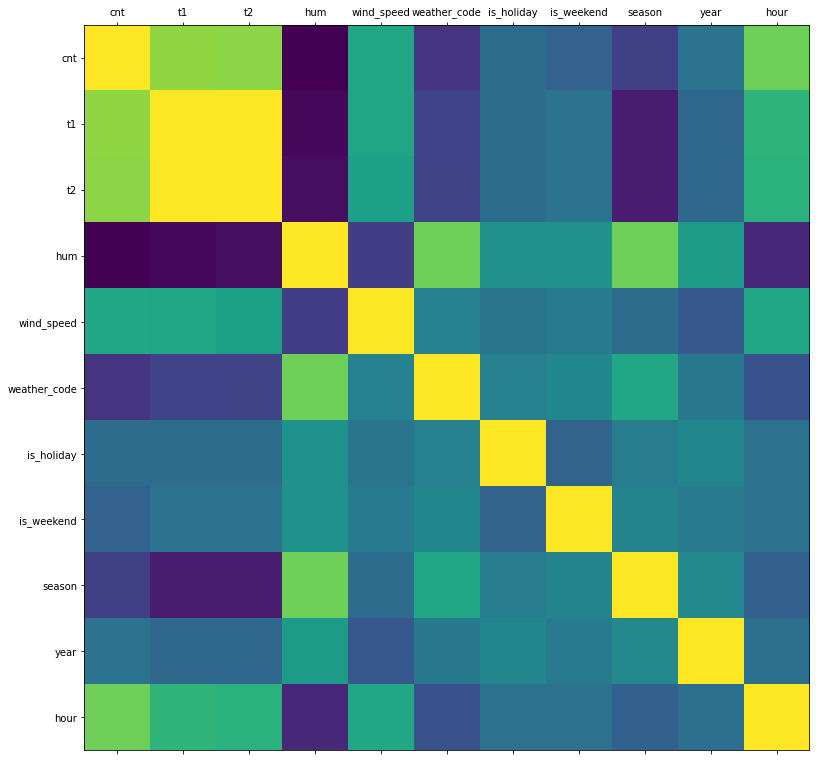

In [11]:
#create df with proper columns to heatmap
df_to_heatmap = df.iloc[:,1:]
corrMatrix = df_to_heatmap.corr()

#create heatmap
plt.figure(figsize=(13,13))
plt.matshow(corrMatrix.corr(),fignum=1)
plt.xticks(ticks = list(range(len(df_to_heatmap.columns))),labels = df_to_heatmap.keys())
plt.yticks(ticks = list(range(len(df_to_heatmap.columns))),labels = df_to_heatmap.keys())
plt.show()

In [12]:
corrMatrix.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour
cnt,1.000000,0.692439,0.675929,-0.845964,0.262179,-0.569584,-0.195918,-0.264077,-0.499163,-0.145639,0.593508
t1,0.692439,1.000000,0.998713,-0.805692,0.241977,-0.472005,-0.195748,-0.145816,-0.702500,-0.227016,0.351154
t2,0.675929,0.998713,1.000000,-0.779650,0.199022,-0.466771,-0.191798,-0.145110,-0.700040,-0.225298,0.332303
hum,-0.845964,-0.805692,-0.779650,1.000000,-0.507375,0.592960,0.094450,0.092385,0.593249,0.162741,-0.632428
wind_speed,0.262179,0.241977,0.199022,-0.507375,1.000000,-0.028142,-0.127179,-0.094057,-0.190093,-0.335174,0.260466
weather_code,-0.569584,-0.472005,-0.466771,0.592960,-0.028142,1.000000,-0.043325,0.015398,0.258232,-0.101756,-0.383771
is_holiday,-0.195918,-0.195748,-0.191798,0.094450,-0.127179,-0.043325,1.000000,-0.260086,-0.070422,0.002627,-0.146770
is_weekend,-0.264077,-0.145816,-0.145110,0.092385,-0.094057,0.015398,-0.260086,1.000000,-0.021860,-0.078317,-0.153337
season,-0.499163,-0.702500,-0.700040,0.593249,-0.190093,0.258232,-0.070422,-0.021860,1.000000,0.026097,-0.271236
year,-0.145639,-0.227016,-0.225298,0.162741,-0.335174,-0.101756,0.002627,-0.078317,0.026097,1.000000,-0.169554


In [13]:
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

Our data set contians data for years 2015-2017. Let's split it on each year and build Linear Regression model.

In [14]:
df_2015 = df[df['year'] == 2015].copy()
df_2016 = df[df['year'] == 2016].copy()
df_2017 = df[df['year'] == 2017].copy()

In [15]:
df_corr['year'] = df['year']
df_corr['hour'] = df['hour']

df_corr['hour'] = (df_corr['hour'] - df_corr['hour'].min()) / (df_corr['hour'].max() - df_corr['hour'].min())
df_corr['cnt1'] = df_corr['cnt']
df_corr = df_corr.drop(labels=['cnt'], axis=1)

df_corr_2015 = df_corr[df_corr['year'] == 2015]
df_corr_2015 = df_corr_2015.drop(labels=['year'], axis=1)

df_corr_2016 = df_corr[df_corr['year'] == 2016]
df_corr_2016 = df_corr_2016.drop(labels=['year'], axis=1)

df_corr_2017 = df_corr[df_corr['year'] == 2017]
df_corr_2017 = df_corr_2017.drop(labels=['year'], axis=1)

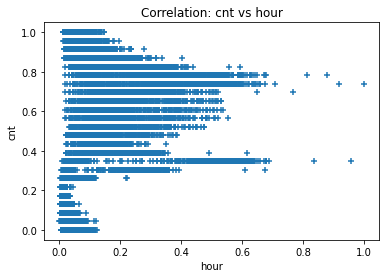

In [16]:
plt.figure()

plt.title('Correlation: cnt vs hour')
plt.scatter(df_corr.cnt1, df_corr.hour, marker='+')
plt.xlabel('hour')
plt.ylabel('cnt')
plt.show() 

In [17]:
#split df on train and test set based on each year:
y_2015 = df_corr_2015['cnt1']
X_2015 = df_corr_2015.drop(labels=['cnt1'], axis=1)
X_train_2015, X_test_2015, y_train_2015, y_test_2015 = train_test_split(X_2015, y_2015, test_size=0.2, random_state=0)

y_2016 = df_corr_2016['cnt1']
X_2016 = df_corr_2016.drop(labels=['cnt1'], axis=1)
X_train_2016, X_test_2016, y_train_2016, y_test_2016 = train_test_split(X_2016, y_2016, test_size=0.2, random_state=0)

y_2017 = df_corr_2017['cnt1']
X_2017 = df_corr_2017.drop(labels=['cnt1'], axis=1)
#we split data on 60/40 here, becasue this df contians only 72 rows
X_train_2017, X_test_2017, y_train_2017, y_test_2017 = train_test_split(X_2017, y_2017, test_size=0.4, random_state=0)

#building regresion model
reg_2015 = LinearRegression()
reg_2015.fit(X_train_2015, y_train_2015)

reg_2016 = LinearRegression()
reg_2016.fit(X_train_2016, y_train_2016)

reg_2017 = LinearRegression()
reg_2017.fit(X_train_2017, y_train_2017)

LinearRegression()

In [18]:
y_pred_2015 = reg_2015.predict(X_test_2015)
print(f'Our model prediction score for 2015 year: {round(r2_score(y_test_2015, y_pred_2015),2)}')

y_pred_2016 = reg_2016.predict(X_test_2016)
print(f'Our model prediction score for 2016 year: {round(r2_score(y_test_2016, y_pred_2016),2)}')

y_pred_2017 = reg_2016.predict(X_test_2017)
print(f'Our model prediction score for 2017 year: {round(r2_score(y_test_2017, y_pred_2017),2)}')

Our model prediction score for 2015 year: 0.32
Our model prediction score for 2016 year: 0.3
Our model prediction score for 2017 year: 0.07


## Conclusions ##

- our data set didn't contain any missing values, so we didn't had to handle with missing data,


- we noticed that the biggest, postive correlation was in t1 and t2 columns, 


- negative correlation was in hum column,


- first, we build model without looking at date column and our prediction score was: **0.27**. Then we split data set per each year - 2015, 2016 and 2017. In 2017 we got the worst result, becasue we had only 72 rows and this to less to build good prediction model. Howver, for year 2015 and 2016 we got better results: **0.32** and **0.3**. This time we also added hour column, but looking and plot with correaltion: cnt vs hour, there wasn't any significantly correlation. One reason of better scores could be less data than previous. However, in the feature, if some data will be added to this set and we will wnat predict cnt values, it is good practise to split data on year.